# Calcula anomalia por ano

In [1]:
import time

In [2]:
%%time
# importa bibliotecas
import salem
import glob
import xarray as xr
import numpy as np

# leitura do shapefile do Brasil
shapefile_brasil = salem.read_shapefile('https://github.com/evmpython/shapefile/raw/main/brasil/BRAZIL.shp')

# lista dos arquivos
files = sorted(glob.glob(f'output/03_netcdf_focos_por_ano/focos_anual_brasil_*.nc')) # focos_anual_brasil_AQUA_2023.nc

# leitura dos arquivos por ano
focos_por_ano = xr.open_mfdataset(files, concat_dim='time', combine='nested')

# coloca "NaN" onde os "focos=0"
condicao = focos_por_ano['focos'][:,:,:] == 0
focos_por_ano['focos'][:,:,:] = np.where(condicao, np.nan, focos_por_ano['focos'][:,:,:])

# calculando a CLIMATOLOGIA: 2003-2023
climatologia = focos_por_ano.sel(time=slice('2003-01-01','2023-12-31')).mean("time")

# calculando a ANOMALIA
anomalia = focos_por_ano['focos'] - climatologia

# recorta o dado para região
anomalia = anomalia.salem.roi(shape=shapefile_brasil)
climatologia = climatologia.salem.roi(shape=shapefile_brasil)

CPU times: total: 6.81 s
Wall time: 29.8 s


In [5]:
print(len(files))

22


In [6]:
files

['output/03_netcdf_focos_por_ano\\focos_anual_brasil_AQUA_2003.nc',
 'output/03_netcdf_focos_por_ano\\focos_anual_brasil_AQUA_2004.nc',
 'output/03_netcdf_focos_por_ano\\focos_anual_brasil_AQUA_2005.nc',
 'output/03_netcdf_focos_por_ano\\focos_anual_brasil_AQUA_2006.nc',
 'output/03_netcdf_focos_por_ano\\focos_anual_brasil_AQUA_2007.nc',
 'output/03_netcdf_focos_por_ano\\focos_anual_brasil_AQUA_2008.nc',
 'output/03_netcdf_focos_por_ano\\focos_anual_brasil_AQUA_2009.nc',
 'output/03_netcdf_focos_por_ano\\focos_anual_brasil_AQUA_2010.nc',
 'output/03_netcdf_focos_por_ano\\focos_anual_brasil_AQUA_2011.nc',
 'output/03_netcdf_focos_por_ano\\focos_anual_brasil_AQUA_2012.nc',
 'output/03_netcdf_focos_por_ano\\focos_anual_brasil_AQUA_2013.nc',
 'output/03_netcdf_focos_por_ano\\focos_anual_brasil_AQUA_2014.nc',
 'output/03_netcdf_focos_por_ano\\focos_anual_brasil_AQUA_2015.nc',
 'output/03_netcdf_focos_por_ano\\focos_anual_brasil_AQUA_2016.nc',
 'output/03_netcdf_focos_por_ano\\focos_anual_br

In [7]:
focos_por_ano

<xarray.Dataset>
Dimensions:  (time: 22, lat: 210, lon: 210)
Coordinates:
  * lat      (lat) float64 7.0 6.8 6.6 6.4 6.2 ... -34.0 -34.2 -34.4 -34.6 -34.8
  * lon      (lon) float64 -75.0 -74.8 -74.6 -74.4 ... -33.8 -33.6 -33.4 -33.2
  * time     (time) datetime64[ns] 2003-12-01 2004-12-01 ... 2024-12-01
Data variables:
    focos    (time, lat, lon) float64 dask.array<chunksize=(1, 210, 210), meta=np.ndarray>

In [8]:
climatologia

<xarray.Dataset>
Dimensions:  (lat: 210, lon: 210)
Coordinates:
  * lat      (lat) float64 7.0 6.8 6.6 6.4 6.2 ... -34.0 -34.2 -34.4 -34.6 -34.8
  * lon      (lon) float64 -75.0 -74.8 -74.6 -74.4 ... -33.8 -33.6 -33.4 -33.2
Data variables:
    focos    (lat, lon) float64 dask.array<chunksize=(210, 210), meta=np.ndarray>
Attributes:
    pyproj_srs:  +proj=longlat +datum=WGS84 +no_defs

In [9]:
anomalia

<xarray.Dataset>
Dimensions:  (time: 22, lat: 210, lon: 210)
Coordinates:
  * lat      (lat) float64 7.0 6.8 6.6 6.4 6.2 ... -34.0 -34.2 -34.4 -34.6 -34.8
  * lon      (lon) float64 -75.0 -74.8 -74.6 -74.4 ... -33.8 -33.6 -33.4 -33.2
  * time     (time) datetime64[ns] 2003-12-01 2004-12-01 ... 2024-12-01
Data variables:
    focos    (time, lat, lon) float64 dask.array<chunksize=(1, 210, 210), meta=np.ndarray>
Attributes:
    pyproj_srs:  +proj=longlat +datum=WGS84 +no_defs

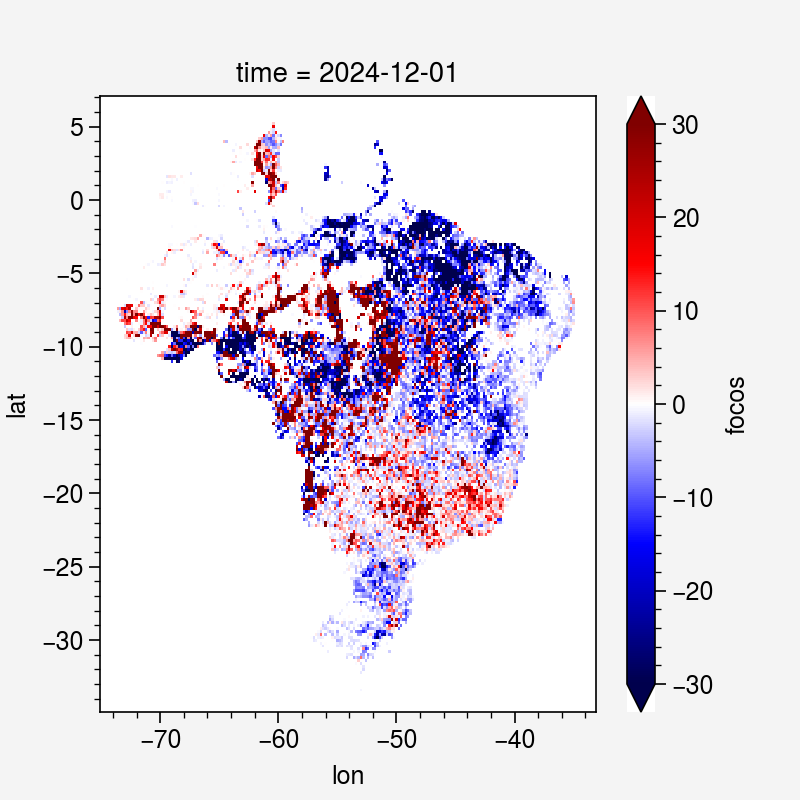

In [10]:
anomalia['focos'].loc['2024-12-01'].salem.roi(shape=shapefile_brasil).plot(vmin=-30, vmax=30, cmap='seismic')

# Plota figura - `BRASIL`

In [3]:
anomalia

<xarray.Dataset>
Dimensions:  (time: 22, lat: 210, lon: 210)
Coordinates:
  * lat      (lat) float64 7.0 6.8 6.6 6.4 6.2 ... -34.0 -34.2 -34.4 -34.6 -34.8
  * lon      (lon) float64 -75.0 -74.8 -74.6 -74.4 ... -33.8 -33.6 -33.4 -33.2
  * time     (time) datetime64[ns] 2003-12-01 2004-12-01 ... 2024-12-01
Data variables:
    focos    (time, lat, lon) float64 dask.array<chunksize=(1, 210, 210), meta=np.ndarray>
Attributes:
    pyproj_srs:  +proj=longlat +datum=WGS84 +no_defs

Processando o ano: .... 2003
Processando o ano: .... 2004
Processando o ano: .... 2005
Processando o ano: .... 2006
Processando o ano: .... 2007
Processando o ano: .... 2008
Processando o ano: .... 2009
Processando o ano: .... 2010
Processando o ano: .... 2011
Processando o ano: .... 2012
Processando o ano: .... 2013
Processando o ano: .... 2014
Processando o ano: .... 2015
Processando o ano: .... 2016
Processando o ano: .... 2017
Processando o ano: .... 2018
Processando o ano: .... 2019
Processando o ano: .... 2020
Processando o ano: .... 2021
Processando o ano: .... 2022
Processando o ano: .... 2023
Processando o ano: .... 2024
CPU times: total: 1min 5s
Wall time: 2min 15s


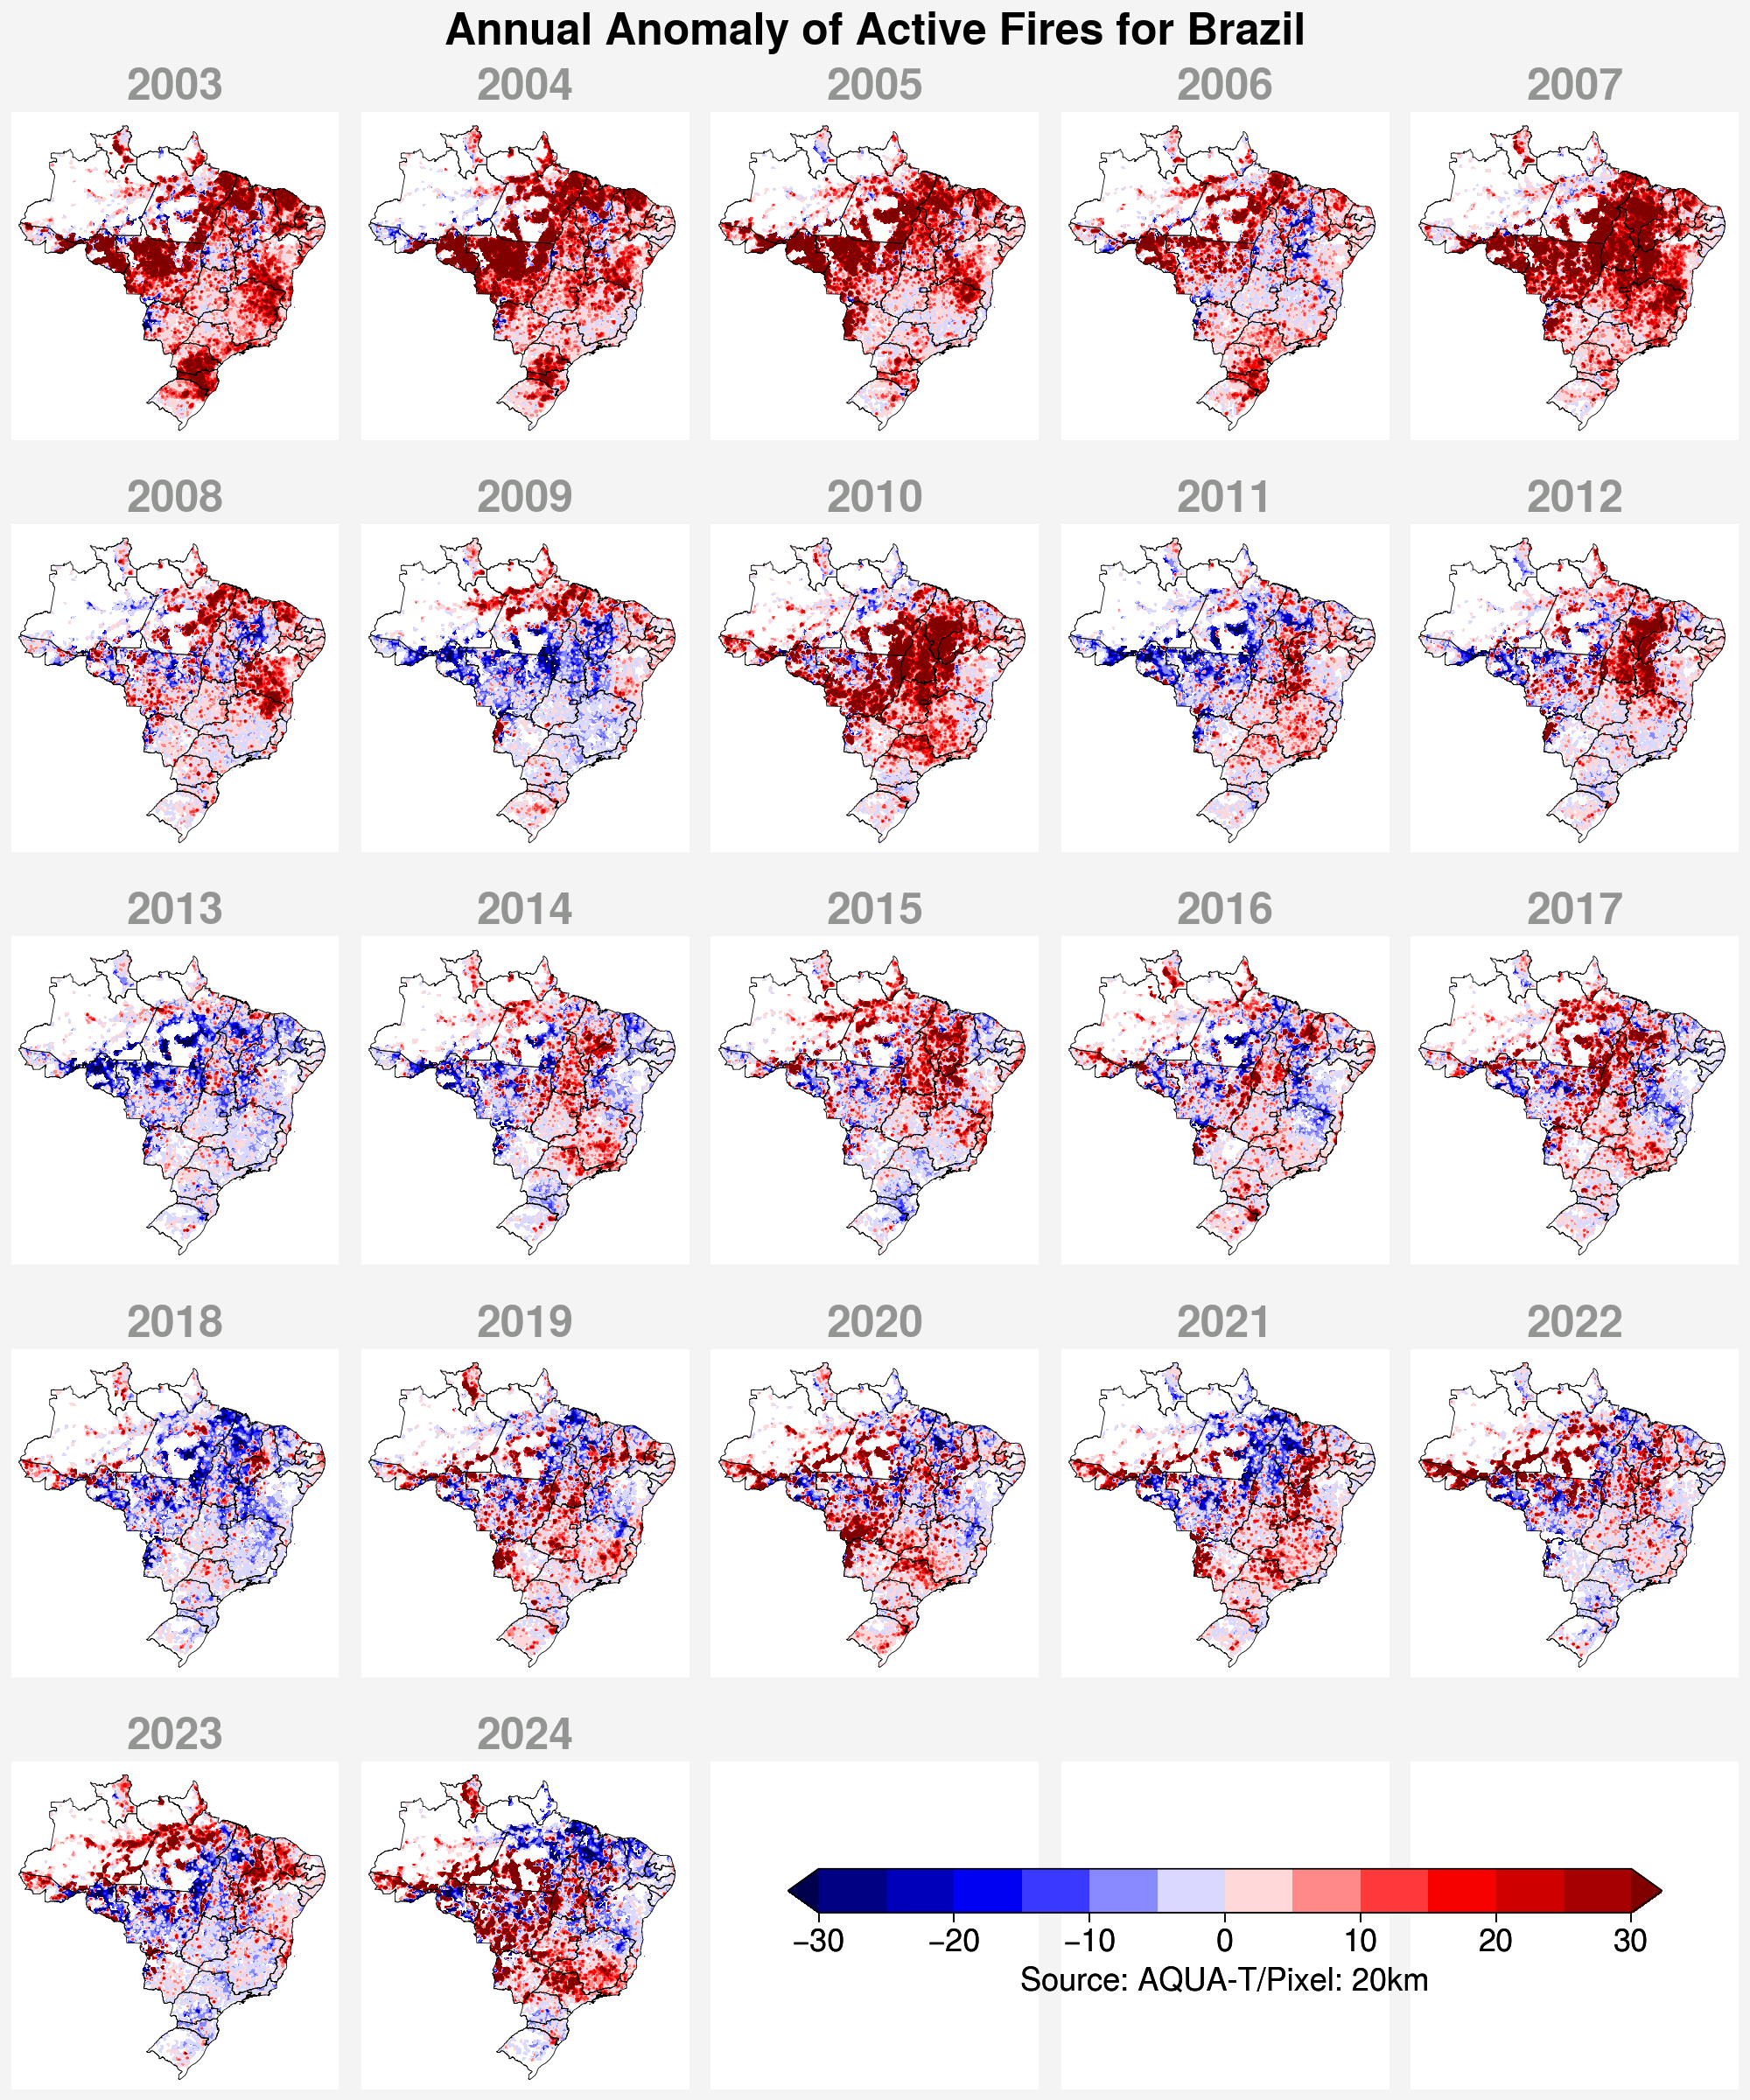

In [4]:
%%time
# import bibliotecas
import proplot as pplt
import cartopy.io.shapereader as shpreader
import cartopy, cartopy.crs as ccrs  
import warnings
warnings.filterwarnings("ignore")

# Limites do Brasil
lonmin, lonmax, latmin, latmax = -75.0, -33.0, -35.0, 7.0

# cria a moldura da figura
fig, ax = pplt.subplots(figsize=(10, 12), 
                        nrows=5, ncols=5, 
                        tight=True, 
                        proj='pcarree', 
                        sharex=True, sharey=True)

# formatação dos eixos
ax.format(coast=False, borders=False, innerborders=False,
          labels=False, latlines=5, lonlines=10,
          latlim=(latmin, latmax), lonlim=(lonmin, lonmax),
          suptitle=f'Annual Anomaly of Active Fires for Brazil',
          small='20px', large='25px',
          linewidth=0, grid=False)

# loop dos anos
for i, ano in enumerate(np.arange(2003, 2025)):

  # exibe na tela o ano que esta sendo processado
  print(f'Processando o ano: .... {ano}')

  # plota figura
  map1 = ax[i].contourf(anomalia['lon'],
                        anomalia['lat'],
                        anomalia['focos'][i,:,:],
                        cmap='seismic',
                        vmin=-30, vmax=30,
                        levels=pplt.arange(-30, 30, 5),
                        extend='both')

  # plota titulo de cada figura
  ax[i].format(title=ano, labels = False, titleloc='c', titlecolor='grey', titleweight='bold')
  
  # plota contornos. Tempo= 9min 10s
  #estados_brasil = salem.read_shapefile('https://github.com/evmpython/shapefile/raw/main/estados_do_brasil/BR_UF_2019.shp')
  #estados_brasil.plot(edgecolor='black', facecolor='none', linewidth=0.5, alpha=1, ax=ax[i])

  # ou. Tempo=2min 43s
  shapefile = list(shpreader.Reader('https://github.com/evmpython/shapefile/raw/main/estados_do_brasil/BR_UF_2019.shp').geometries())
  ax[i].add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='black', facecolor='none', linewidth=0.3)

# plota barra de cores da figura
fig.colorbar(map1, 
             loc='b',
             label='Source: AQUA-T/Pixel: 20km', 
             ticks=10, 
             ticklabelsize=13, 
             labelsize=13, 
             length=0.85, 
             width=0.25,
             space=-12,
             cols=(3,5))

# salva figura
fig.savefig('output/04_figuras_anomalia_anual/anomalia_focos_anual_brasil.jpg', transparent=True, dpi=300, bbox_inches="tight")

# Plota figura - `SÃO PAULO`

In [5]:
# leitura do shapefile de SP
shapefile_sp = salem.read_shapefile('https://github.com/evmpython/shapefile/raw/main/UFs/SP/SP_UF_2019.shp')

# recorta o dado para região
anomalia = anomalia.salem.roi(shape=shapefile_sp)
climatologia = climatologia.salem.roi(shape=shapefile_sp)

Processando o ano: .... 1 , 2003
Processando o ano: .... 2 , 2004
Processando o ano: .... 3 , 2005
Processando o ano: .... 4 , 2006
Processando o ano: .... 5 , 2007
Processando o ano: .... 6 , 2008
Processando o ano: .... 7 , 2009
Processando o ano: .... 8 , 2010
Processando o ano: .... 9 , 2011
Processando o ano: .... 10 , 2012
Processando o ano: .... 11 , 2013
Processando o ano: .... 12 , 2014
Processando o ano: .... 13 , 2015
Processando o ano: .... 14 , 2016
Processando o ano: .... 15 , 2017
Processando o ano: .... 16 , 2018
Processando o ano: .... 17 , 2019
Processando o ano: .... 18 , 2020
Processando o ano: .... 19 , 2021
Processando o ano: .... 20 , 2022
Processando o ano: .... 21 , 2023
Processando o ano: .... 22 , 2024
CPU times: total: 15.9 s
Wall time: 26.6 s


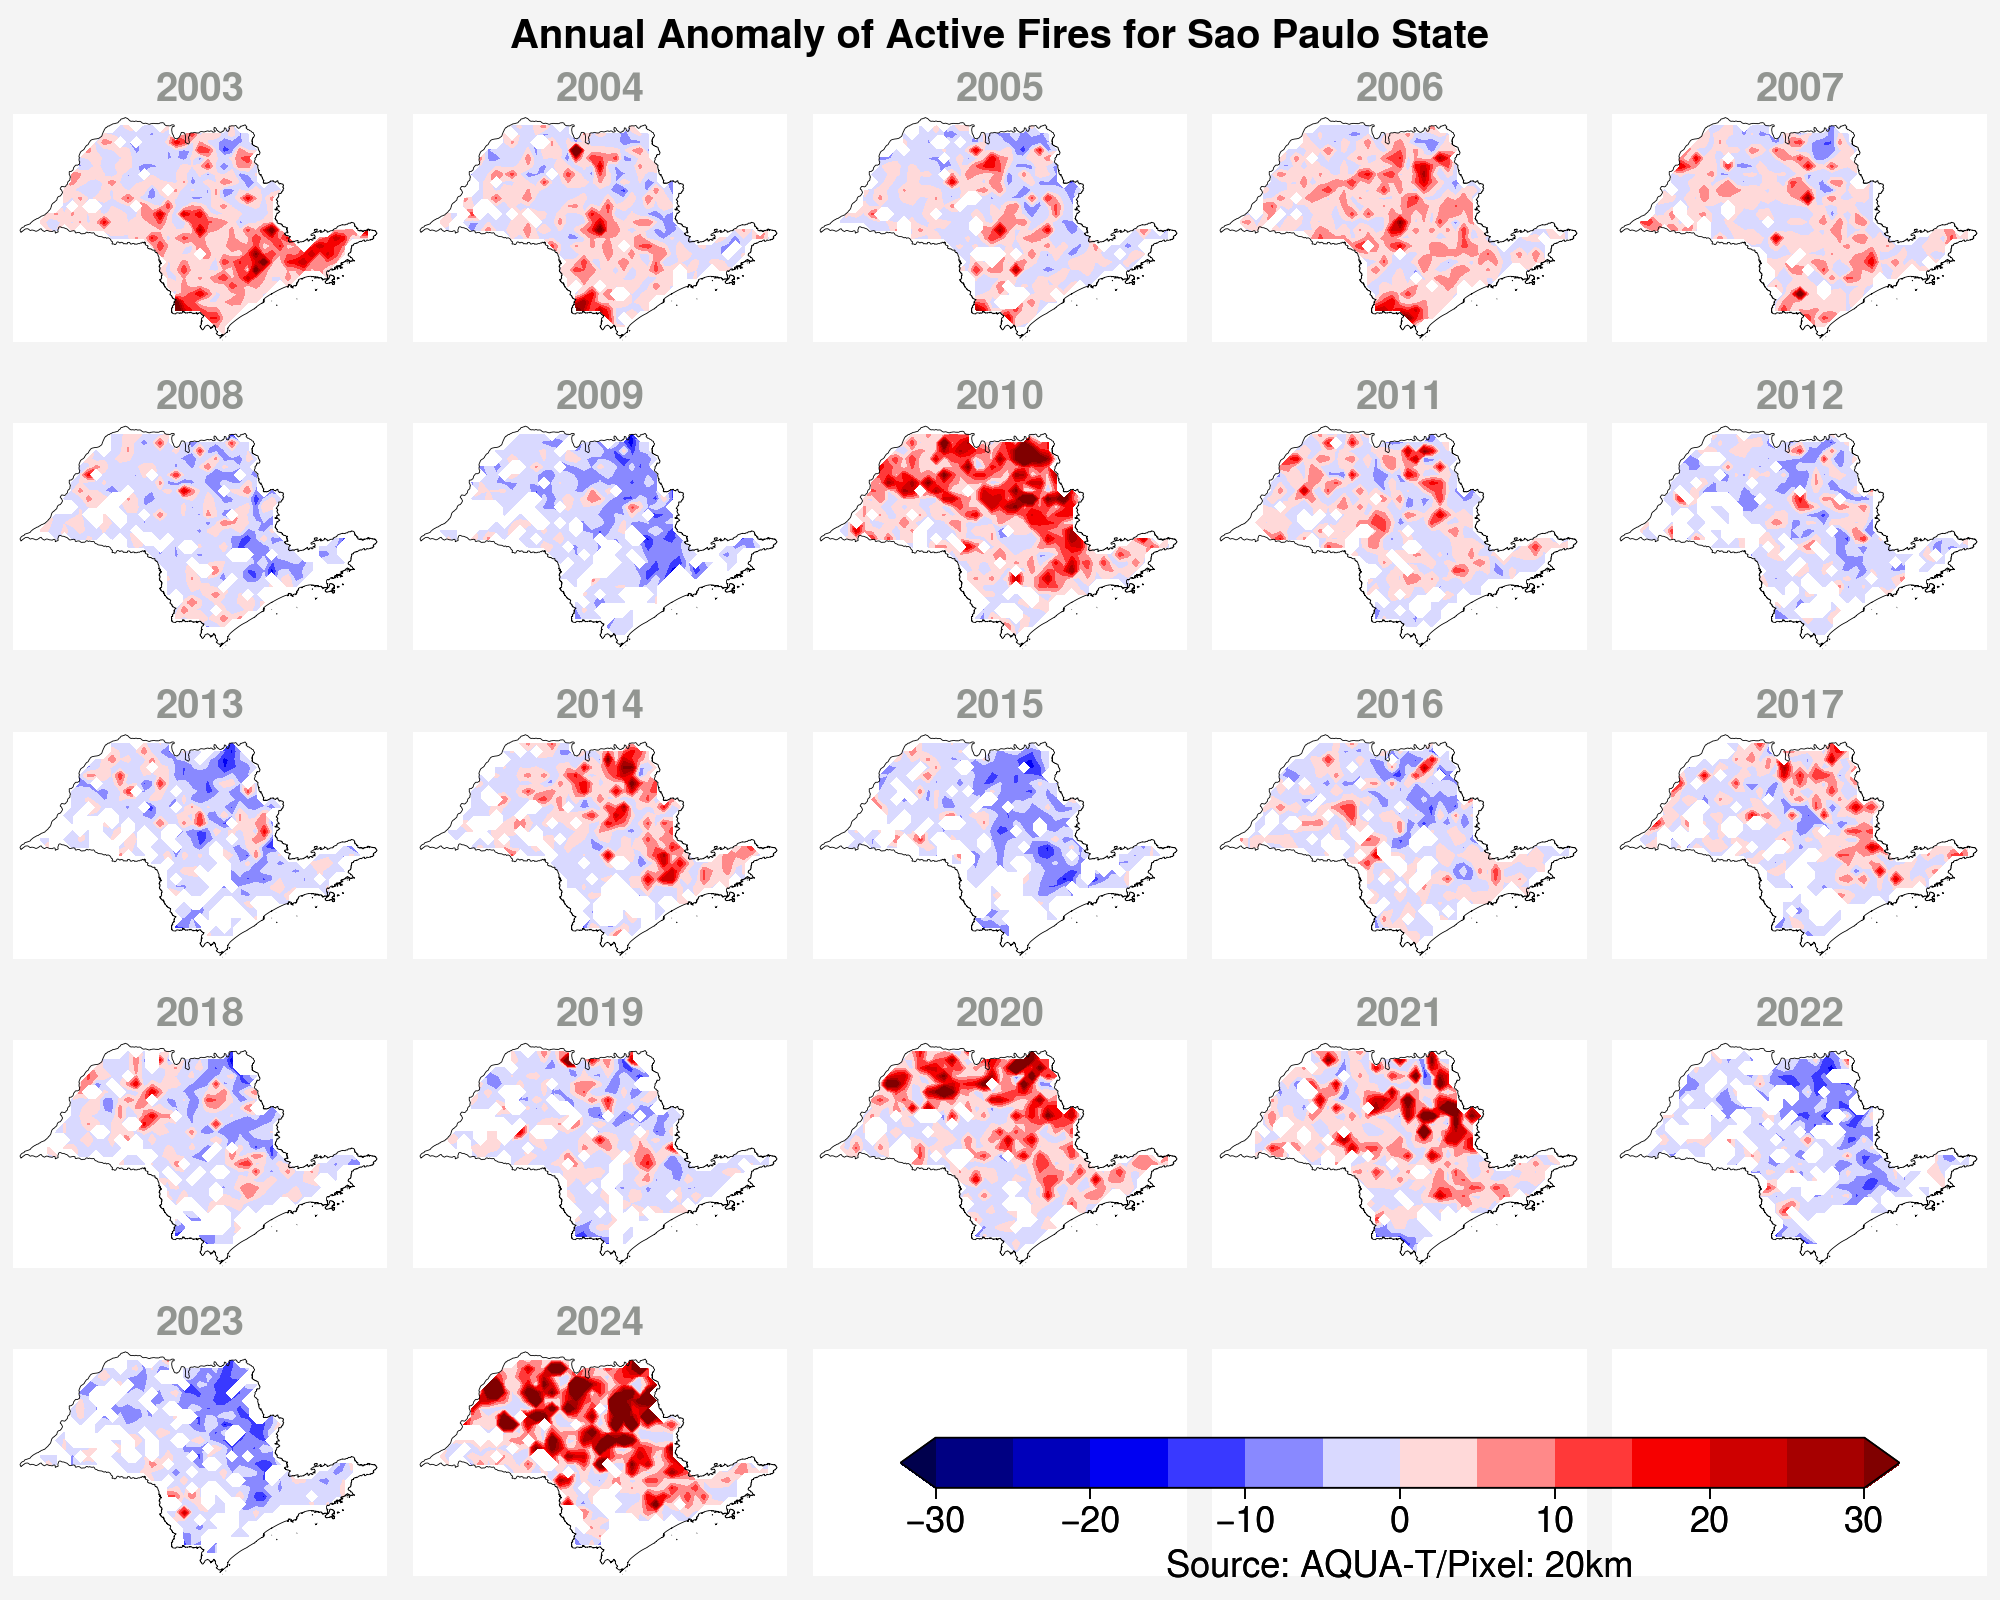

In [20]:
%%time
# import bibliotecas
import proplot as pplt
import cartopy.io.shapereader as shpreader
import cartopy, cartopy.crs as ccrs  
import warnings
warnings.filterwarnings("ignore")

# Limites de SP
lonmin, lonmax, latmin, latmax = -53.3, -43.9, -25.4, -19.7

# cria a moldura da figura
fig, ax = pplt.subplots(figsize=(10, 8), 
                        nrows=5, ncols=5, 
                        tight=True, 
                        proj='pcarree', 
                        sharex=True, sharey=True)

# formatação dos eixos
ax.format(coast=False, borders=False, innerborders=False,
          labels=False, latlines=5, lonlines=10,
          latlim=(latmin, latmax), lonlim=(lonmin, lonmax),
          suptitle=f'Annual Anomaly of Active Fires for Sao Paulo State',
          small='5px', large='20px',
          linewidth=0, grid=False)

# loop dos anos
for i, ano in enumerate(np.arange(2003, 2025)):

  # exibe na tela o ano que esta sendo processado
  print(f'Processando o ano: .... {i+1} , {ano}')

  # plota figura
  map1 = ax[i].contourf(anomalia['lon'],
                        anomalia['lat'],
                        anomalia['focos'][i,:,:],
                        cmap='seismic',
                        vmin=-30, vmax=30,
                        levels=pplt.arange(-30, 30, 5),
                        extend='both')

  # plota titulo de cada figura
  ax[i].format(title=ano, labels = False, titleloc='c', titlecolor='grey', titleweight='bold', small='5px')
  
  # plota contornos. Tempo= 9min 10s
  #estados_brasil = salem.read_shapefile('https://github.com/evmpython/shapefile/raw/main/estados_do_brasil/BR_UF_2019.shp')
  #estados_brasil.plot(edgecolor='black', facecolor='none', linewidth=0.5, alpha=1, ax=ax[i])

  # ou. Tempo=2min 43s
  shapefile = list(shpreader.Reader('https://github.com/evmpython/shapefile/raw/main/UFs/SP/SP_UF_2019.shp').geometries())
  ax[i].add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='black', facecolor='none', linewidth=0.3)

# plota barra de cores da figura
fig.colorbar(map1, 
             loc='b',
             label='Source: AQUA-T/Pixel: 20km', 
             ticks=10, 
             ticklabelsize=13, 
             labelsize=13, 
             length=0.85, 
             width=0.25,
             space=-7,
             cols=(3,5))

# salva figura
fig.savefig('output/04_figuras_anomalia_anual/anomalia_focos_anual_sp.jpg', transparent=True, dpi=300, bbox_inches="tight")